In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [6]:
df.shape

(511, 14)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [9]:
# as it can be seen, there are 5 null values in thr column RM
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


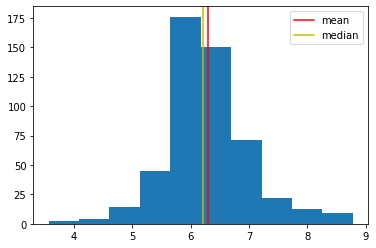

In [15]:
# For a better visualization
plt.hist(df['RM']);
plt.axvline(df['RM'].mean(), color='r', label = "mean")
plt.axvline(df['RM'].median(), color='y', label = "median")
plt.legend()

In [16]:
# Let's replace the null values with their mean
df['RM'].fillna(df['RM'].mean(),inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       511 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [19]:
# check again
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

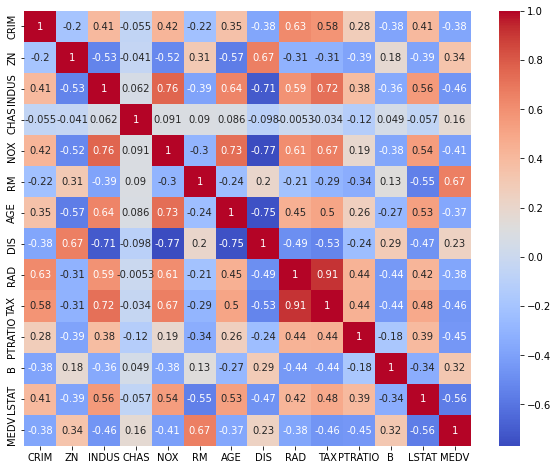

In [22]:
# Now, let's study the correlation using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(houses.corr(), annot = True, cmap='coolwarm')

In [23]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198451,0.405524,-0.054906,0.420524,-0.220194,0.350847,-0.377028,0.625964,0.583389,0.276695,-0.384356,0.405030,-0.380072
ZN,-0.198451,1.000000,-0.534106,-0.041333,-0.516256,0.307493,-0.567796,0.665185,-0.307146,-0.311531,-0.392844,0.175637,-0.390029,0.339767
INDUS,0.405524,-0.534106,1.000000,0.062332,0.763583,-0.390061,0.642817,-0.707886,0.591784,0.718764,0.379441,-0.356955,0.556707,-0.463269
CHAS,-0.054906,-0.041333,0.062332,1.000000,0.091023,0.089919,0.085814,-0.097541,-0.005343,-0.034244,-0.124415,0.048970,-0.057013,0.164782
NOX,0.420524,-0.516256,0.763583,0.091023,1.000000,-0.301079,0.729233,-0.768309,0.609343,0.666982,0.186073,-0.379936,0.540050,-0.411486
RM,-0.220194,0.307493,-0.390061,0.089919,-0.301079,1.000000,-0.236693,0.198635,-0.212719,-0.293359,-0.338351,0.127778,-0.552251,0.666954
AGE,0.350847,-0.567796,0.642817,0.085814,0.729233,-0.236693,1.000000,-0.745097,0.452229,0.503360,0.258251,-0.271925,0.529994,-0.368203
DIS,-0.377028,0.665185,-0.707886,-0.097541,-0.768309,0.198635,-0.745097,1.000000,-0.488474,-0.530379,-0.238155,0.290997,-0.467063,0.233469
RAD,0.625964,-0.307146,0.591784,-0.005343,0.609343,-0.212719,0.452229,-0.488474,1.000000,0.910211,0.438646,-0.442406,0.422389,-0.379016
TAX,0.583389,-0.311531,0.718764,-0.034244,0.666982,-0.293359,0.503360,-0.530379,0.910211,1.000000,0.440962,-0.440830,0.482088,-0.459274


In [53]:
# for a more readable form
dataCorr = df.corr()
dataCorr = dataCorr[abs(dataCorr) >= 0.01].stack().reset_index()
dataCorr = dataCorr[dataCorr['level_0'].astype(str)!=dataCorr['level_1'].astype(str)]
 
# filtering out lower/upper triangular duplicates 
dataCorr['ordered-cols'] = dataCorr.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
dataCorr = dataCorr.drop_duplicates(['ordered-cols'])
dataCorr.drop(['ordered-cols'], axis=1, inplace=True)
# # dataCorr['v0.mean'] = df[dataCorr['level_0']].mean()
# for i in dataCorr['level_0']:
#     dataCorr['v0_mean']=df[i].mean()
 
dataCorr.sort_values(by=[0], ascending=False).head(10) #Get 10 highest correlation of pairwaise attributes

,level_0,level_1,0
119,RAD,TAX,0.910211
32,INDUS,NOX,0.763583
61,NOX,AGE,0.729233
37,INDUS,TAX,0.718764
64,NOX,TAX,0.666982
82,RM,MEDV,0.666954
21,ZN,DIS,0.665185
34,INDUS,AGE,0.642817
8,CRIM,RAD,0.625964
63,NOX,RAD,0.609343


In [ ]:
# As it can be seen from above, RAD and TAX are very correlated to each other,
# therefore, we should exclude one of them 

In [57]:
print('RAD mean ', df['RAD'].mean())
print('TAX mean ', df['TAX'].mean())

RAD mean  9.4853228962818
TAX mean  407.440313111546


In [58]:
# I read that the highest value should be eliminated cause double correlation causes some problems in prediction
df_copy = df.copy()

In [61]:
df_copy = df_copy.drop(['TAX'], axis=1)
df_copy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,23.0,343.00,76.00,67.0


c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

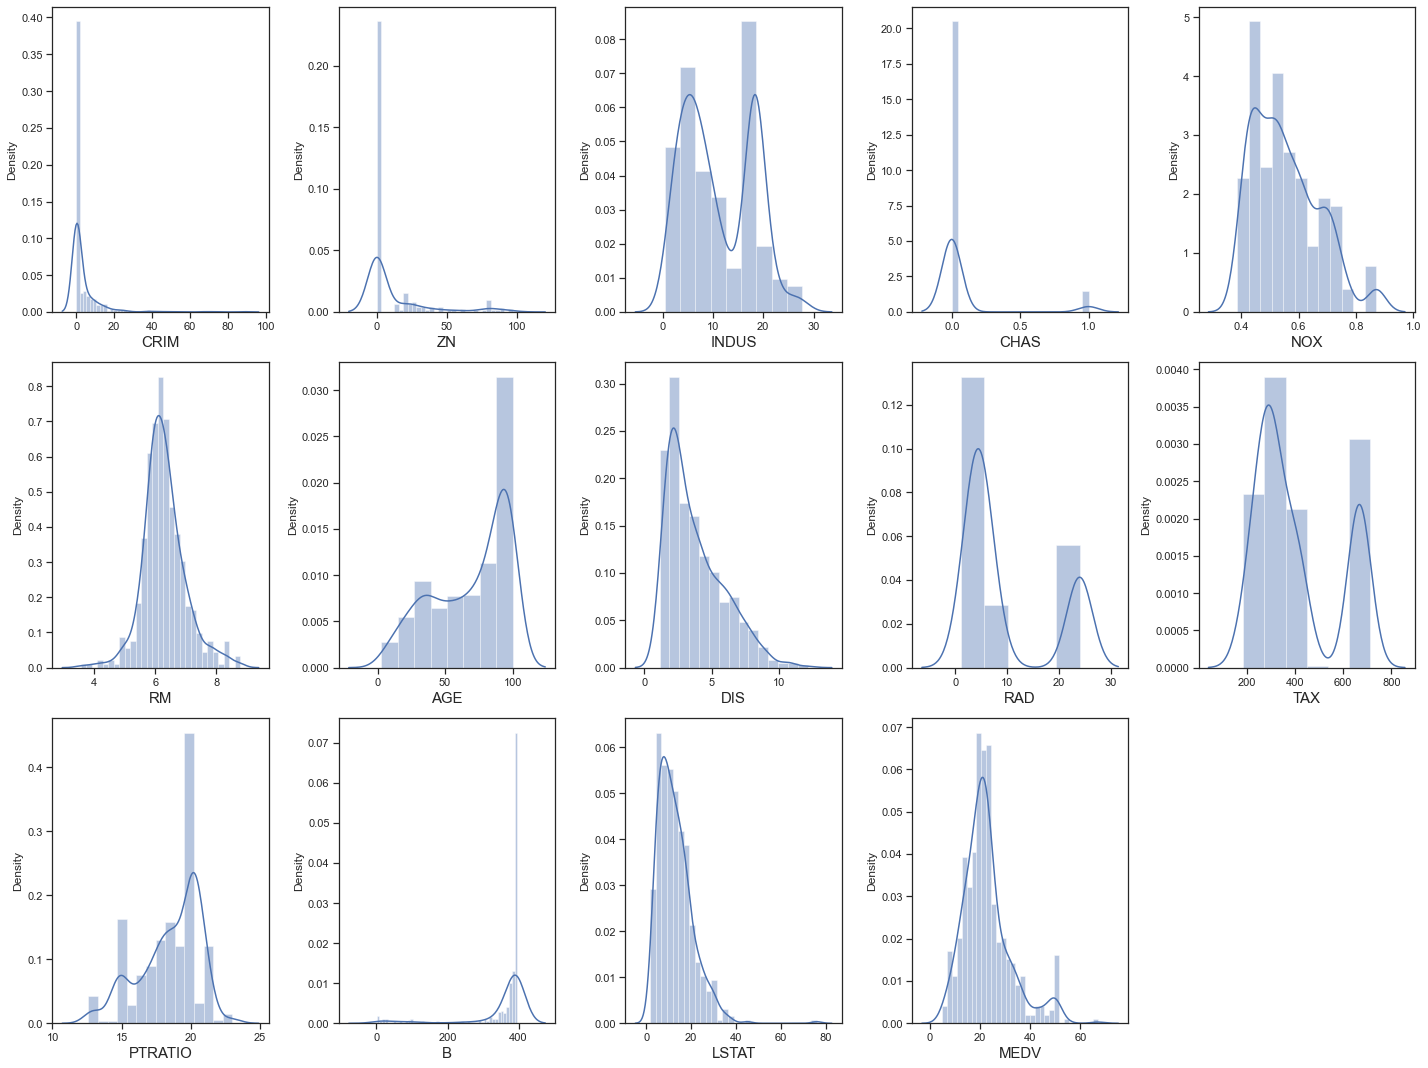

In [111]:
# Let's see how data is distributed for every column
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [64]:
# Spliting target variable and independent variables
X = df_copy.drop(['MEDV'], axis = 1)
y = df_copy['MEDV']

In [106]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 16)

In [107]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lr = LinearRegression()

# Train the model using the training sets 
lr.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred = lr.predict(X_test)

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Squared Error (MSE) =', mean_squared_error(y_pred, y_test))
print('Mean Absolute Error (MAE) =', mean_absolute_error(y_pred, y_test))


Mean Squared Error (MSE) = 21.223027732829443
Mean Absolute Error (MAE) = 3.569394695391037
